In [2]:
!pip install shap

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [43]:
import numpy as np
from numpy import genfromtxt
import time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import shap
import pandas as pd


par_len=9
my_data = genfromtxt("D:\Research_work\COVID_paper\My_covid_research\interpretability\optimal_policy/new_siqrd_pol.csv", delimiter=',')
X=my_data[:,0:par_len] # Paramaeters
Y=my_data[:,par_len:] #Policies

#---Parameter Dictionary of New SIQRD Model
#p1= alpha
#p2= t_o
#p3= gamma1
#p4= gamma2
#p5=beta
#p6=K



X = pd.DataFrame({'p1': np.squeeze(X[:,0]), 'p2': np.squeeze(X[:,1]), 'p3': np.squeeze(X[:,2]), 'p4': np.squeeze(X[:,3]), 'p5': np.squeeze(X[:,4]),'p6': np.squeeze(X[:,5]), 'p7': np.squeeze(X[:,6]), 'p8': np.squeeze(X[:,7]), 'p9': np.squeeze(X[:,8])})

Y = pd.DataFrame({'Pol1': np.squeeze(Y[:,0]), 'Pol2': np.squeeze(Y[:,1]), 'Pol3': np.squeeze(Y[:,2]), 'Pol4': np.squeeze(Y[:,3]), 'Pol5': np.squeeze(Y[:,4]),
                            'Pol6': np.squeeze(Y[:,5]), 'Pol7': np.squeeze(Y[:,6]), 'Pol8': np.squeeze(Y[:,7]), 'Pol9': np.squeeze(Y[:,8]), 'Pol10': np.squeeze(Y[:,9])})

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)




# scaler2 = MinMaxScaler()
# Y = scaler2.fit_transform(Y)



def get_model(n_inputs, n_outputs):
    model = Sequential()
    # model.add(keras.layers.BatchNormalization())
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
    # model.add(keras.layers.Dropout(0.2))
    # model.add(keras.layers.BatchNormalization())
    # model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    # model.add(Dense(32*2, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform',activation='linear'))
    model.compile(loss='mse', metrics='accuracy',optimizer=keras.optimizers.Adam(learning_rate=0.001),)
    return model

n_inputs, n_outputs = X.shape[1], Y.shape[1]

model = get_model(n_inputs, n_outputs)

model.fit(X, Y, verbose=0, epochs=100)

explainer = shap.KernelExplainer(model = model.predict, data = X, link = "identity")
shap_values = explainer.shap_values(X)


Using 340 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 340/340 [1:05:18<00:00, 11.52s/it]


In [45]:
from itertools import chain
greek_codes   = chain(range(0x370, 0x3e2), range(0x3f0, 0x400))
greek_symbols = (chr(c) for c in greek_codes)
greek_letters = [c for c in greek_symbols if c.isalpha()]
my_letters=greek_letters[51:61]
para_names=[my_letters[5],my_letters[1]+str(1),my_letters[1]+str(2),my_letters[0]+str(1),my_letters[0]+str(2),my_letters[3],'K','to',my_letters[2]]
print(para_names)

['ζ', 'β1', 'β2', 'α1', 'α2', 'δ', 'K', 'to', 'γ']


Policy#01


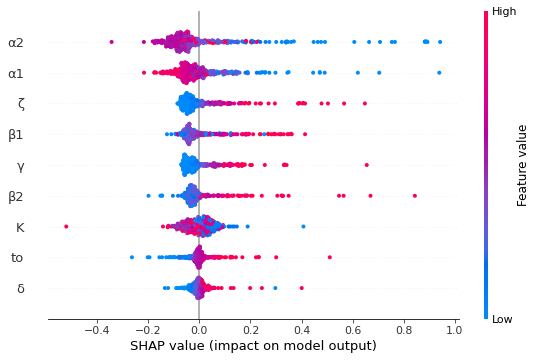

Policy#02


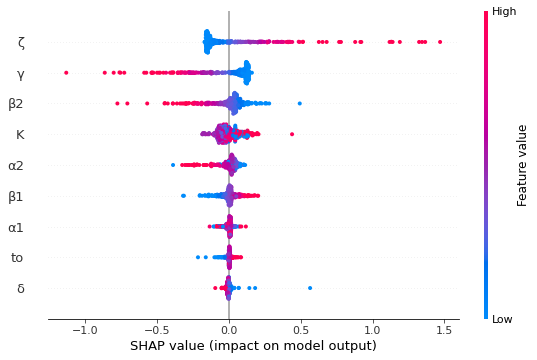

Policy#03


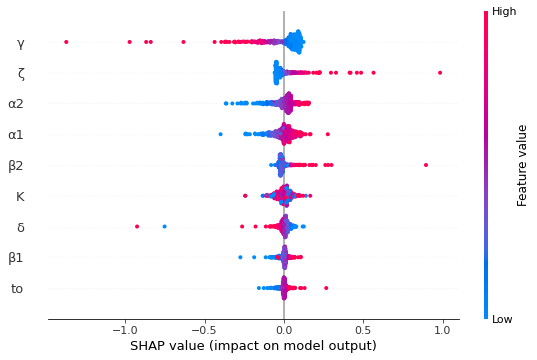

Policy#04


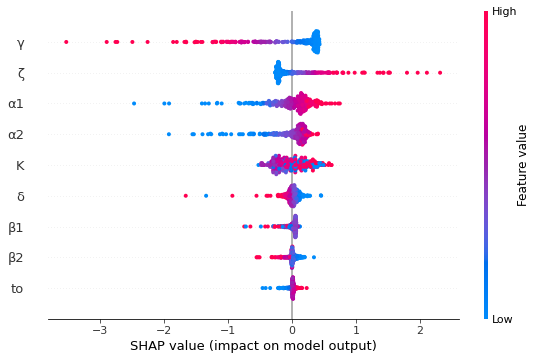

Policy#06


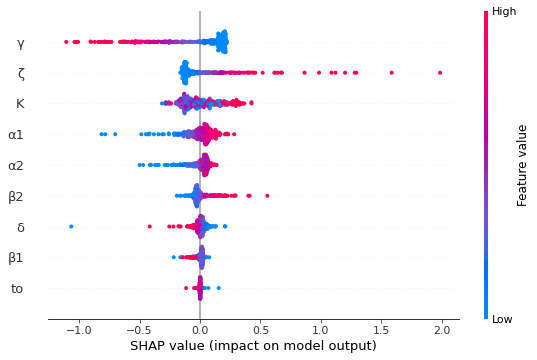

Policy#07


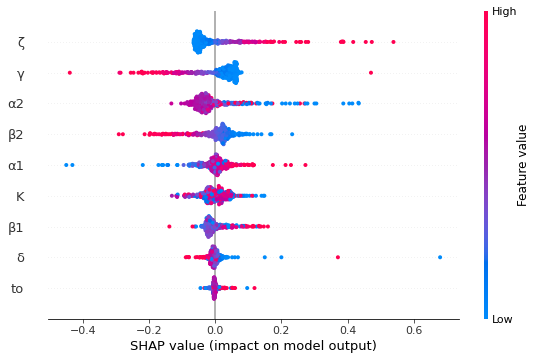

Policy#09


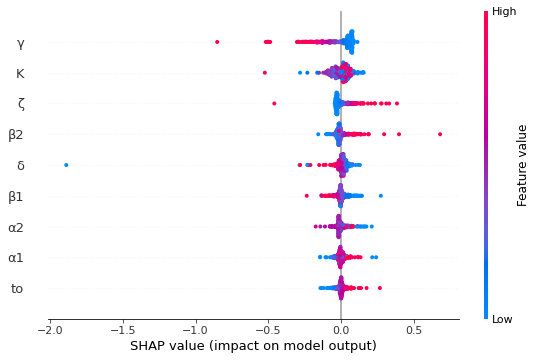

Policy#10


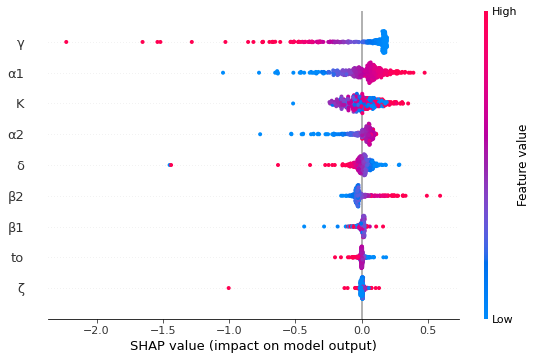

In [46]:
# Print for Policy#01= Record closings of schools and universities

print("Policy#01")
shap.summary_plot(shap_values = shap_values[0],
                  features = X,feature_names=para_names
                  )


# Print for Policy#02= Record closings of workplaces
print("Policy#02")
shap.summary_plot(shap_values = shap_values[1],
                  features = X,feature_names=para_names
                  )


# Print for Policy#03= Record cancelling public events
print("Policy#03")
shap.summary_plot(shap_values = shap_values[2],
                  features = X,feature_names=para_names
                  )


# Print for Policy#04= Record limits on private gatherings
print("Policy#04")
shap.summary_plot(shap_values = shap_values[3],
                  features = X,feature_names=para_names
                  )


# # Print for Policy#05= Record orders to "shelter-in-place" and otherwise confine to the home
# print("Policy#05")
# shap.summary_plot(shap_values = shap_values[4],
#                   features = X,feature_names=para_names
#                   )


# Print for Policy#06= Record restrictions on internal movement between cities/regions
print("Policy#06")
shap.summary_plot(shap_values = shap_values[5],
                  features = X,feature_names=para_names
                  )


# Print for Policy#07= Record restrictions on international travel / Note: this records policy for foreign travellers, not citizens
print("Policy#07")
shap.summary_plot(shap_values = shap_values[6],
                  features = X,feature_names=para_names
                  )


# # Print for Policy#08= Record presence of public info campaigns
# print("Policy#08")
# shap.summary_plot(shap_values = shap_values[7],
#                   features = X,feature_names=para_names
#                   )


# Print for Policy#09=  Record government policy on contact tracing after a positive diagnosis (Note: we are looking for policies that would identify all people potentially exposed to Covid-19;
print("Policy#09")
shap.summary_plot(shap_values = shap_values[8],
                  features = X,feature_names=para_names
                  )


# Print for Policy#10=  Record policies on the use of facial coverings outside the home
print("Policy#10")
shap.summary_plot(shap_values = shap_values[9],
                  features = X,feature_names=para_names
                  )

In [47]:
import numpy as np
from numpy import genfromtxt
import time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import shap
import pandas as pd

my_data = genfromtxt("D:\Research_work\COVID_paper\My_covid_research\interpretability\optimal_policy/old_siqrd_pol.csv", delimiter=',')
X=my_data[:,0:5] # Paramaeters
Y=my_data[:,5:] #Policies


#---Parameter Dictionary of Old SIQRD Model
#p1= alpha
#p2= beta
#p3= gamma1
#p4= gamma2
#p5= delta


X = pd.DataFrame({'p1': np.squeeze(X[:,0]), 'p2': np.squeeze(X[:,1]), 'p3': np.squeeze(X[:,2]), 'p4': np.squeeze(X[:,3]), 'p5': np.squeeze(X[:,4])})

Y = pd.DataFrame({'Pol1': np.squeeze(Y[:,0]), 'Pol2': np.squeeze(Y[:,1]), 'Pol3': np.squeeze(Y[:,2]), 'Pol4': np.squeeze(Y[:,3]), 'Pol5': np.squeeze(Y[:,4]),
                            'Pol6': np.squeeze(Y[:,5]), 'Pol7': np.squeeze(Y[:,6]), 'Pol8': np.squeeze(Y[:,7]), 'Pol9': np.squeeze(Y[:,8]), 'Pol10': np.squeeze(Y[:,9])})
# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


scaler2 = MinMaxScaler()
Y = scaler2.fit_transform(Y)



def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dense(32*2, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform',activation='sigmoid'))
    model.compile(loss='mae', optimizer='adam')
    return model

n_inputs, n_outputs = X.shape[1], Y.shape[1]

model = get_model(n_inputs, n_outputs)

model.fit(X, Y, verbose=0, epochs=100)

explainer = shap.KernelExplainer(model = model.predict, data = X, link = "identity")
shap_values = explainer.shap_values(X)


Using 340 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 340/340 [03:53<00:00,  1.46it/s]


Policy#01


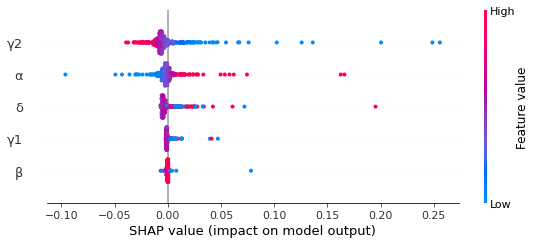

Policy#02


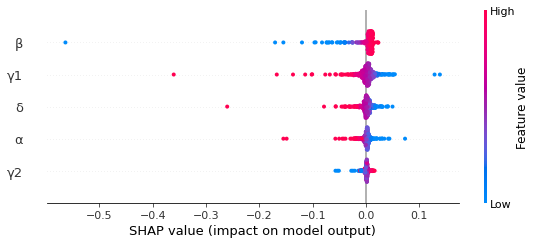

Policy#03


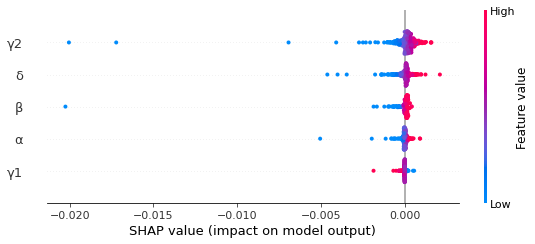

Policy#04


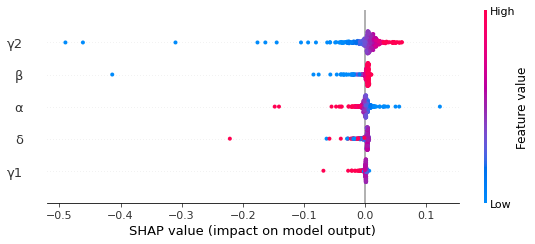

Policy#06


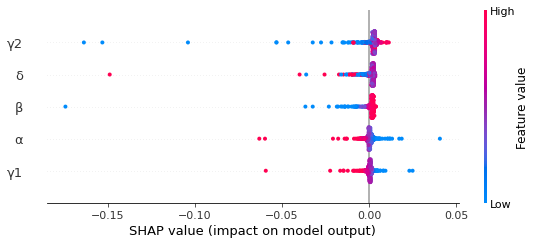

Policy#07


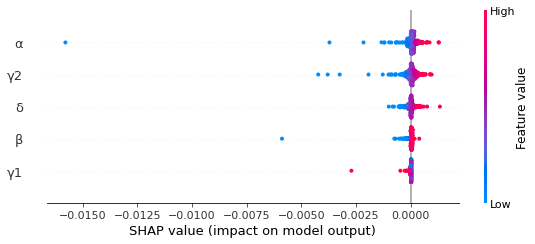

Policy#09


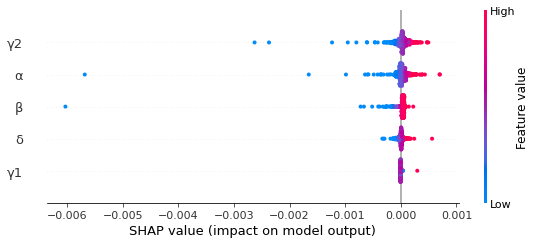

Policy#10


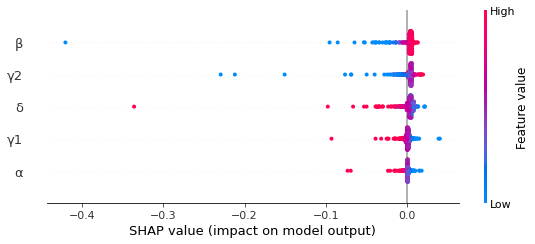

In [48]:
# Print for Policy#01= Record closings of schools and universities

para_names=[my_letters[0],my_letters[1],my_letters[2]+str(1),my_letters[2]+str(2),my_letters[3]]


print("Policy#01")
shap.summary_plot(shap_values = shap_values[0],
                  features = X,feature_names=para_names
                  )


# Print for Policy#02= Record closings of workplaces
print("Policy#02")
shap.summary_plot(shap_values = shap_values[1],
                  features = X,feature_names=para_names
                  )


# Print for Policy#03= Record cancelling public events
print("Policy#03")
shap.summary_plot(shap_values = shap_values[2],
                  features = X,feature_names=para_names
                  )


# Print for Policy#04= Record limits on private gatherings
print("Policy#04")
shap.summary_plot(shap_values = shap_values[3],
                  features = X,feature_names=para_names
                  )


# # Print for Policy#05= Record orders to "shelter-in-place" and otherwise confine to the home
# print("Policy#05")
# shap.summary_plot(shap_values = shap_values[4],
#                   features = X,feature_names=para_names
#                   )


# Print for Policy#06= Record restrictions on internal movement between cities/regions
print("Policy#06")
shap.summary_plot(shap_values = shap_values[5],
                  features = X,feature_names=para_names
                  )


# Print for Policy#07= Record restrictions on international travel / Note: this records policy for foreign travellers, not citizens
print("Policy#07")
shap.summary_plot(shap_values = shap_values[6],
                  features = X,feature_names=para_names
                  )


# # Print for Policy#08= Record presence of public info campaigns
# print("Policy#08")
# shap.summary_plot(shap_values = shap_values[7],
#                   features = X,feature_names=para_names
#                   )


# Print for Policy#09=  Record government policy on contact tracing after a positive diagnosis (Note: we are looking for policies that would identify all people potentially exposed to Covid-19;
print("Policy#09")
shap.summary_plot(shap_values = shap_values[8],
                  features = X,feature_names=para_names
                  )


# Print for Policy#10=  Record policies on the use of facial coverings outside the home
print("Policy#10")
shap.summary_plot(shap_values = shap_values[9],
                  features = X,feature_names=para_names
                  )